In [1]:
"/content/gDrive/MyDrive"

'/content/gDrive/MyDrive'

In [2]:
!pip install texthero -U
!pip install gensim
!pip install pyLDAvis==2.1.2
!pip install -U spacy
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 5.1 MB/s 
     |████████████████████████████████| 10.4 MB 25.2 MB/s 
     |████████████████████████████████| 184 kB 45.2 MB/s 
     |████████████████████████████████| 1.0 MB 9.3 MB/s 
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.4
    Uninstalling srsly-2.4.4:
      Successfully uninstalled srsly-2.4.4
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.8
    Uninstalling catalogue-2.0.8:
      Successfully uninstalled catalogue-2.0.8
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.0
    Uninstalling thinc-8.1.0:
      Successfully uninstalled thinc-8.1.0
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.1
    Uninstalling spacy-3.4.1:
      Successfully uninstalled spacy-3.4.1
ERROR: pip's dependency resolver does not currently take into 

In [3]:
# data manipulation
import pandas as pd
import numpy as np
import io 

import re
import nltk
from nltk.tokenize import TweetTokenizer
import string
import spacy

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import matplotlib.colors as mcolors

#modelling

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from collections import Counter
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


In [5]:
df=pd.read_csv('dataset.csv')

In [6]:
df.head()

,ID,AuthorID,Author,Date,Content,Words,"Change in appetite, losing or gaining weight",Sleeping too much or not sleeping well (insomnia),Fatigue and low energy most days,"Feeling worthless, guilty, and hopeless","An inability to focus and concentrate that may interfere with daily tasks at home, work, or school",Movements that are unusually slow or agitated (a change which is often noticeable to others),Thinking about death and dying; suicidal ideation or suicide attempts,None
0,1,4.560000e+17,Deleted User#0000,43630.77639,**List of International Suicide Hotlines**\n``...,72,N,N,N,N,N,N,N,Y
1,2,4.560000e+17,Deleted User#0000,43630.78611,"Hello, if you're depressed, being self-depreca...",56,N,N,N,Y,N,N,Y,N
2,3,4.680000e+17,angel?#5373,43630.84306,Please note that we are not professionals. Th...,61,N,N,N,N,N,N,N,Y
3,4,5.450000e+17,Sease#2410,43630.84514,yeah and people who just want attention don't ...,36,N,N,N,N,N,N,N,Y
4,5,3.030000e+17,Emma/Blue#2035,43630.85347,Just a small vent my arm hurts so much i know ...,41,N,N,N,Y,Y,Y,N,N


In [7]:
df=df.dropna()
df.isnull().sum()

ID                                                                                                    0
AuthorID                                                                                              0
Author                                                                                                0
Date                                                                                                  0
Content                                                                                               0
Words                                                                                                 0
Change in appetite, losing or gaining weight                                                          0
Sleeping too much or not sleeping well (insomnia)                                                     0
Fatigue and low energy most days                                                                      0
Feeling worthless, guilty, and hopeless                         

In [8]:
list(df)

['ID',
 'AuthorID',
 'Author',
 'Date',
 'Content',
 'Words',
 'Change in appetite, losing or gaining weight',
 'Sleeping too much or not sleeping well (insomnia)',
 'Fatigue and low energy most days',
 'Feeling worthless, guilty, and hopeless',
 'An inability to focus and concentrate that may interfere with daily tasks at home, work, or school',
 'Movements that are unusually slow or agitated (a change which is often noticeable to others)',
 'Thinking about death and dying; suicidal ideation or suicide attempts',
 'None']

In [9]:
df['None'] = df['None'].map({'Y': 1, 'N': 0})
df['Change in appetite, losing or gaining weight']=df['Change in appetite, losing or gaining weight'].map({'Y': 1, 'N': 0})
df['Sleeping too much or not sleeping well (insomnia)']=df['Sleeping too much or not sleeping well (insomnia)'].map({'Y': 1, 'N': 0})
df['Fatigue and low energy most days']=df['Fatigue and low energy most days'].map({'Y': 1, 'N': 0})
df['Feeling worthless, guilty, and hopeless']=df['Feeling worthless, guilty, and hopeless'].map({'Y': 1, 'N': 0})
df['An inability to focus and concentrate that may interfere with daily tasks at home, work, or school']=df['An inability to focus and concentrate that may interfere with daily tasks at home, work, or school'].map({'Y': 1, 'N': 0})
df['Movements that are unusually slow or agitated (a change which is often noticeable to others)']=df['Movements that are unusually slow or agitated (a change which is often noticeable to others)'].map({'Y': 1, 'N': 0})
df['Thinking about death and dying; suicidal ideation or suicide attempts']=df['Thinking about death and dying; suicidal ideation or suicide attempts'].map({'Y': 1, 'N': 0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [10]:
df.rename(columns={"Change in appetite, losing or gaining weight": "symp_one", "Sleeping too much or not sleeping well (insomnia)": "symp_two",
                  "Fatigue and low energy most days":'symp_three','Feeling worthless, guilty, and hopeless':'symp_four',
                  'An inability to focus and concentrate that may interfere with daily tasks at home, work, or school':'symp_five',
                  'Movements that are unusually slow or agitated (a change which is often noticeable to others)':'symp_six',
                  'Thinking about death and dying; suicidal ideation or suicide attempts':'symp_seven'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
df.head(5)

,ID,AuthorID,Author,Date,Content,Words,symp_one,symp_two,symp_three,symp_four,symp_five,symp_six,symp_seven,None
0,1,4.560000e+17,Deleted User#0000,43630.77639,**List of International Suicide Hotlines**\n``...,72,0,0,0,0.0,0,0,0.0,1.0
1,2,4.560000e+17,Deleted User#0000,43630.78611,"Hello, if you're depressed, being self-depreca...",56,0,0,0,1.0,0,0,1.0,0.0
2,3,4.680000e+17,angel?#5373,43630.84306,Please note that we are not professionals. Th...,61,0,0,0,0.0,0,0,0.0,1.0
3,4,5.450000e+17,Sease#2410,43630.84514,yeah and people who just want attention don't ...,36,0,0,0,0.0,0,0,0.0,1.0
4,5,3.030000e+17,Emma/Blue#2035,43630.85347,Just a small vent my arm hurts so much i know ...,41,0,0,0,1.0,1,1,0.0,0.0


### Cleaning Text Data

In [12]:
tt = TweetTokenizer()
tokens = df['Content'].apply(tt.tokenize)
print(tokens)

0        [*, *, List, of, International, Suicide, Hotli...
1        [Hello, ,, if, you're, depressed, ,, being, se...
2        [Please, note, that, we, are, not, professiona...
3        [yeah, and, people, who, just, want, attention...
4        [Just, a, small, vent, my, arm, hurts, so, muc...
                               ...                        
23989    [>, And, it, ‚, Äôs, just, getting, so, annoyi...
23990    [And, I, ‚, Äôm, mixed, so, I, get, called, th...
23991    [>, @SAD, BHABHIE, ., oof, that's, a, good, th...
23992    [>, And, I, ‚, Äôm, mixed, so, I, get, called,...
23993    [>, Yeah, I, ‚, Äôve, ignored, it, for, 5, yea...
Name: Content, Length: 23978, dtype: object


In [13]:
df['Content']=df['Content'].apply(lambda x: x.split(',,')[0])
df['Content']=df['Content'].apply(lambda x: x.split(',,,')[0])

In [14]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['Content']=df['Content'].apply(lambda x:expand_contractions(x))

In [15]:
#Lowering the comments
df['Content']=df['Content'].apply(lambda x: x.lower())

#Remove digits and words containing numbers
df['Content']=df['Content'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Remove Punctuation
df['Content']=df['Content'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

#Remove extra space
df['Content']=df['Content'].apply(lambda x: re.sub(' +',' ',x))


In [16]:
for index,text in enumerate(df['Content'][15:20]):
    print('data %d:\n'%(index+1),text)

data 1:
 i did that a few minutes ago but the thing is that it feels like a sharp pain
data 2:
 kinda got in a bike crash a couple of hours ago and hurt my ankle so there is my story 
data 3:
 okay if it is ankle then make sure the pain is coming from the scratch and not because you got a sprained ankle if it is the latter you need to place your leg on something higher than the rest of your body level to maintain proper blood flow fleekthumbsup and place some ice on it preferably 

if it is just a scratch and you are sure that is where the pain is coming from then clean it and put a bandage on and hope for the best lol
data 4:
 i was swimming and then i just got a really bad pain and could not walk without the pain
data 5:
 care üíï i hate my parents they treat me like cinderella they expect me to do everything like the dishes cleaning the counter tops etc when i was loading the dishwasher i called my nana a bitch because she was acting like one and my papa the abusive shit he is came

In [17]:
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['Content']=df['Content'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [18]:
df

,ID,AuthorID,Author,Date,Content,Words,symp_one,symp_two,symp_three,symp_four,symp_five,symp_six,symp_seven,None
0,1,4.560000e+17,Deleted User#0000,43630.77639,list international suicide hotline \n argentin...,72,0,0,0,0.0,0,0,0.0,1.0
1,2,4.560000e+17,Deleted User#0000,43630.78611,hello depressed selfdeprecate thing bad talk a...,56,0,0,0,1.0,0,0,1.0,0.0
2,3,4.680000e+17,angel?#5373,43630.84306,note professional community try help good abil...,61,0,0,0,0.0,0,0,0.0,1.0
3,4,5.450000e+17,Sease#2410,43630.84514,yeah people want attention actually listen peo...,36,0,0,0,0.0,0,0,0.0,1.0
4,5,3.030000e+17,Emma/Blue#2035,43630.85347,small vent arm hurt know need doctor can‚äôt a...,41,0,0,0,1.0,1,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23989,23995,3.110000e+17,AfonsoHackers#6969,44071.59167,it‚äôs get annoying i‚äôm \n sluttywhoreü¶¶...,26,0,0,0,0.0,0,0,0.0,1.0
23990,23996,6.460000e+17,sluttywhoreü¶¶#3156,44071.59236,i‚äôm mixed call n word hard r year,18,0,0,0,1.0,0,0,0.0,0.0
23991,23997,7.240000e+17,SAD BHABHIE.#3636,44071.59236,sad bhabhie oof good thing suppose mean find...,50,0,0,0,0.0,0,0,0.0,1.0
23992,23998,7.240000e+17,SAD BHABHIE.#3636,44071.59236,i‚äôm mixed call n word hard r year \n slutt...,21,0,0,0,1.0,0,0,0.0,0.0


In [19]:
df_train = df.sample(frac=0.8, random_state=1000)
df_test = df.drop(df_train.index)

In [20]:
df_train.shape

(19182, 14)

In [21]:
df_test.shape

(4796, 14)

In [22]:
df_grouped=df[['Author','Content']].groupby(by='Author').agg(lambda x:' '.join(x))
df_grouped.head()

,Content
Author,
! Daddy Rey#3248,year old mad make joke cheer people lmfaoo wan...
!Nunu#9000,good thing u breaking love makeover day hard k...
!neo#8684,suicide isn‚äôt answer pass problem people cha...
$>sp7r7t<$#0773,blame pain side spectrum bad feeling world per...
(T y l e r)#5353,care ô£ø√º√≠√ø recently lose family member get...


In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
import texthero as hero 
from texthero import preprocessing
from textblob import TextBlob 
from gensim.models import LdaModel
from gensim import models
from gensim import corpora
import pyLDAvis.gensim
from wordcloud import WordCloud, STOPWORDS

# Creating Document Term Matrix
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['Content'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaa,aaaandd,aaah,aaand,aabout,aahh,aand,aandth,aaron,...,üôå,üôç,üôè,üôé,üôñ,œµ,œâ,œâœπœ,œä,πô
Author,,,,,,,,,,,,,,,,,,,,,
! Daddy Rey#3248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
!Nunu#9000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
!neo#8684,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# creating a custom pipeline to preprocess the raw text we have
df_grouped['Content'] = hero.remove_stopwords(df_grouped['Content'])
custom_pipeline = [preprocessing.fillna
                   , preprocessing.lowercase
                   , preprocessing.remove_digits
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_stopwords
                   , preprocessing.remove_whitespace
                   , preprocessing.stem]

# simply call clean() method to clean the raw text in 'tweet' col and pass the custom_pipeline to pipeline argument
df_grouped['Content'] = hero.clean(df_grouped['Content'], pipeline = custom_pipeline)

In [25]:
print(df_grouped)

                                                                           Content
Author                                                                            
! Daddy Rey#3248                 year old mad make joke cheer peopl lmfaoo want...
!Nunu#9000                       good thing u break love makeov day hard keep c...
!neo#8684                        suicid aot answer pass problem peopl chanc day...
$>sp7r7t<$#0773                  blame pain side spectrum bad feel world person...
(T y l e r)#5353                   care oooo recent lose famili member get tab bit
...                                                                            ...
üíúKamekoüíú#5107              suppos stress make stress oao lol matter think...
üíû~ùòãùò¶ùò∏ùò∫~üíï#6367  mean let know ao interest sexual relat use pro...
üñ§Writer_By_Nightüñ§#7103     feel work long close like close peopl start no...
üòàüòàüòà‚ù§#3570             zoink scoob u goodby u love hope u kitter ur a...
ü•Ä

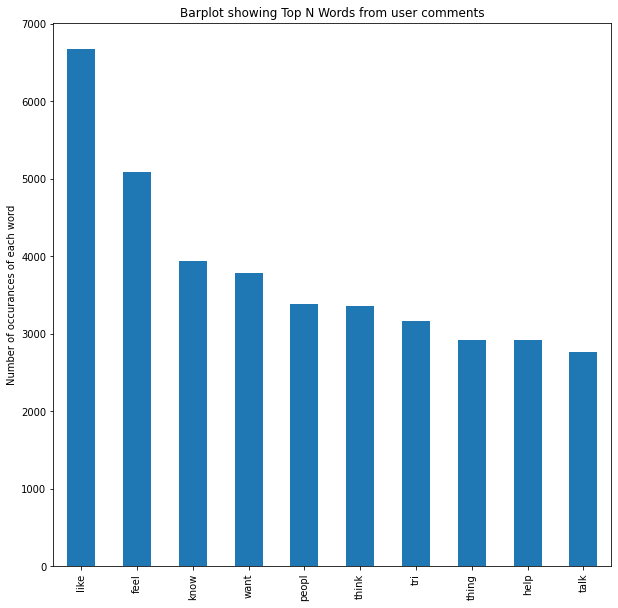

In [26]:
hero.top_words(df_grouped['Content']).head(10).plot.bar(figsize=(10,10))
plt.title('Barplot showing Top N Words from user comments')
plt.ylabel('Number of occurances of each word')
plt.show()

In [27]:
# using top_words() method, get the top N words and make a bar plot.
top_words=hero.top_words(df_grouped['Content'])
top_words

like           6680
feel           5092
know           3937
want           3781
peopl          3390
               ... 
tefaya            1
yearn             1
unleash           1
fearpressur       1
neosporin         1
Name: Content, Length: 11670, dtype: int64

In [28]:
from texthero import stopwords
default_stopwords = stopwords.DEFAULT
#add a list of stopwords to the stopwords
stop_w = ["get", "know", "peopl", "think", "go", "thing", "thi", "talk", "time", "friend", "tri", "want", "feel", "make", "like", "one", "realli", "say", "could", "got", "see", "also", "wanna", "look", "mayb", "keep", "still", "way", "aony", "im", "me", "you", "aot", "said", "day", "=", "i", "would", "right", "alway", "happen", ",", ".", "aon", "aom"]
custom_stopwords = default_stopwords.union(set(stop_w))
#Call remove_stopwords and pass the custom_stopwords list
df_grouped['Content'] = hero.remove_stopwords(df_grouped['Content'], custom_stopwords)

Text(0.5, 1.0, 'Wordcloud showing top N words removing stopwords')

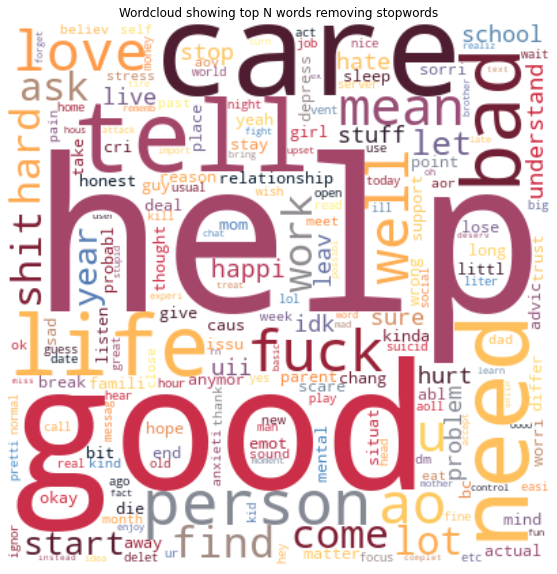

In [29]:
hero.visualization.wordcloud(df_grouped['Content'],width = 400, height= 400,background_color='White')
plt.title('Wordcloud showing top N words removing stopwords')

In [30]:
# Applying Lambda function on comments column to notice positive sentiment among customers. For this, we search for comments like "good, great, like, best, enjoy."
searchfor = ['good', 'great', 'like', 'best', 'enjoy','must', 'love', 'clean']
df_grouped["positive_sentiment"] = df_grouped['Content'].apply(lambda x: 1 if any(i in x for i in searchfor) else 0) 
df_grouped.tail(6)

,Content,positive_sentiment
Author,,
üíúDreamerTheWolfFoxüíö#7237,stuff find manhattan bridg bodi find river ago,0
üíúKamekoüíú#5107,suppos stress stress oao lol matter suicid m...,1
üíû~ùòãùò¶ùò∏ùò∫~üíï#6367,mean let ao interest sexual relat use protect...,0
üñ§Writer_By_Nightüñ§#7103,work long close close start notic justterri...,1
üòàüòàüòà‚ù§#3570,zoink scoob u goodby u love hope u kitter ur ...,1
ü•ÄSomiü•Ä#9186,dr nurs school aod antibiot u neosporin cover,0


Performing Basic Sentiment Analysis:

The sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity).

The polarity score is a float within the range [-1.0, 1.0].

The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

In [31]:
df_grouped[['polarity', 'subjectivity']] = df_grouped['Content'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment)) #Checking polarity and subjectivity using sentiment property
df_grouped

,Content,positive_sentiment,polarity,subjectivity
Author,,,,
! Daddy Rey#3248,year old mad joke cheer lmfaoo lmao u bout...,0,-0.084524,0.542857
!Nunu#9000,good u break love makeov hard check discord...,1,0.005357,0.613690
!neo#8684,suicid answer pass problem chanc negat ...,0,0.000000,0.000000
$>sp7r7t<$#0773,blame pain side spectrum bad world person h...,1,-0.067361,0.682639
(T y l e r)#5353,care oooo recent lose famili member tab bit,0,0.000000,0.250000
...,...,...,...,...
üíúKamekoüíú#5107,suppos stress stress oao lol matter suicid m...,1,-0.004346,0.553068
üíû~ùòãùò¶ùò∏ùò∫~üíï#6367,mean let ao interest sexual relat use protect...,0,0.044494,0.630208
üñ§Writer_By_Nightüñ§#7103,work long close close start notic justterri...,1,-0.114916,0.557920


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 63743 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 63743 missing from current font.
  font.set_text(s, 0, flags=flags)


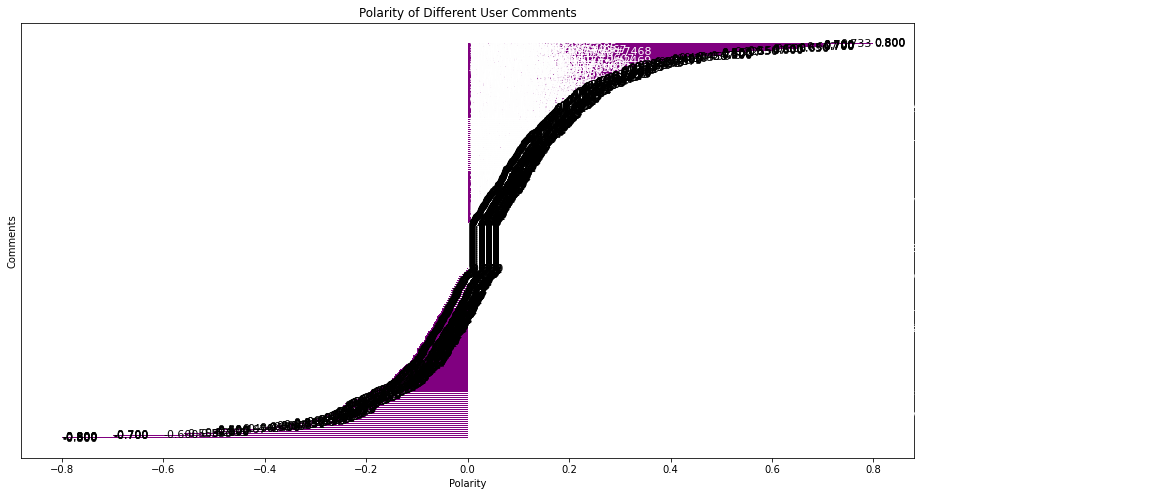

In [32]:
Author_polarity_sorted=pd.DataFrame(df_grouped.groupby('Author')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Comments')
plt.title('Polarity of Different User Comments')
polarity_graph=plt.barh(np.arange(len(Author_polarity_sorted.index)),Author_polarity_sorted['polarity'],color='purple',)

# Writing product names on bar
for bar,Author in zip(polarity_graph,Author_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(Author),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,Author_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()

# Build Random Forest Models for Each Symptom

In [33]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# Define a function to plot AUC metric
def plot_auc(dep_test, preds):
  fpr, tpr, t = roc_curve(dep_test, preds, pos_label=1)
  auc_score = roc_auc_score(dep_test, preds)

  base = [0 for i in range(len(dep_test))]
  fpr0, tpr0, t0 = roc_curve(dep_test, base, pos_label=1)

  print('AUC:', auc_score)

  plt.plot(fpr, tpr, linestyle='-',color='green', label='Naive Bayes')
  plt.plot(fpr0, tpr0, linestyle='--', color='blue')

  plt.title('ROC')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')

  plt.legend()
  plt.show();

# Define a function to plot training history for neural network 
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

## Symptom 1

In [34]:
# Set indicator for symptoms except symp 1 to 0
df_symp_one_Y = df[df['symp_one']==1][['ID','Content','symp_one']]
df_symp_one_Y=df_symp_one_Y.rename(columns={'symp_one':'symp'})

df_symp_two_Y = df[df['symp_two']== 1][['ID','Content','symp_two']]
df_symp_two_Y=df_symp_two_Y.rename(columns={'symp_two':'symp'})
df_symp_two_Y["symp"].replace({1: 0}, inplace=True)

df_symp_three_Y = df[df['symp_three']==1][['ID','Content','symp_three']]
df_symp_three_Y=df_symp_three_Y.rename(columns={'symp_three':'symp'})
df_symp_three_Y["symp"].replace({1: 0}, inplace=True)

df_symp_four_Y = df[df['symp_four']==1][['ID','Content','symp_four']]
df_symp_four_Y=df_symp_four_Y.rename(columns={'symp_four':'symp'})
df_symp_four_Y["symp"].replace({1: 0}, inplace=True)

df_symp_five_Y = df[df['symp_five']==1][['ID','Content','symp_five']]
df_symp_five_Y=df_symp_five_Y.rename(columns={'symp_five':'symp'})
df_symp_five_Y["symp"].replace({1: 0}, inplace=True)

df_symp_six_Y = df[df['symp_six']==1][['ID','Content','symp_six']]
df_symp_six_Y=df_symp_six_Y.rename(columns={'symp_six':'symp'})
df_symp_six_Y["symp"].replace({1: 0}, inplace=True)

df_symp_seven_Y = df[df['symp_seven']==1][['ID','Content','symp_seven']]
df_symp_seven_Y=df_symp_seven_Y.rename(columns={'symp_seven':'symp'})
df_symp_seven_Y["symp"].replace({1: 0}, inplace=True)

df_symp_None_Y = df[df['None']==1][['ID','Content','None']]
df_symp_None_Y=df_symp_None_Y.rename(columns={'None':'symp'})
df_symp_None_Y["symp"].replace({1: 0}, inplace=True)

In [35]:
df_trans=pd.concat([df_symp_one_Y,df_symp_two_Y,df_symp_three_Y, df_symp_four_Y, df_symp_five_Y,df_symp_six_Y ,
                   df_symp_seven_Y, df_symp_None_Y], ignore_index=True)

# add a new column, the length of the content 
df_trans['length']=df_trans['Content'].apply(len)

In [36]:
def get_samples(df):

  X=df[['Content']]
  y=df['symp'].astype(int)

  # Split train-test data
  cont_train, cont_test, dep_train, dep_test = train_test_split(X, y, test_size=0.3, random_state=1000)

  # summarize class distribution
  print("Before oversampling: ", Counter(dep_train))

  # balance data
  under = RandomUnderSampler(sampling_strategy=0.4)
  over = RandomOverSampler(sampling_strategy="minority")
  steps = [('u',under), ('o',over)]
  pipeline = Pipeline(steps=steps)
  cont_train, dep_train = pipeline.fit_resample(cont_train, dep_train)

  # summarize class distribution
  print("After oversampling: ", Counter(dep_train))

  return cont_train,cont_test,dep_train,dep_test

In [37]:
# Vectorize text 
cont_train, cont_test,dep_train,dep_test = get_samples(df_trans)
vectorizer_sym1 = TfidfVectorizer(analyzer='word',stop_words= 'english')
vectorizer_sym1.fit_transform(cont_train["Content"])
cont_train_vec=vectorizer_sym1.transform(cont_train["Content"]).toarray()
cont_test_vec=vectorizer_sym1.transform(cont_test['Content']).toarray()

Before oversampling:  Counter({0: 18248, 1: 302})
After oversampling:  Counter({0: 755, 1: 755})


[[7219  588]
 [  60   84]]
Recall   : 0.5833333333333334
Accuracy : 0.9185008175072318
AUC: 0.7540081550745058


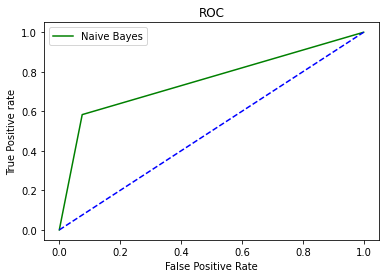

In [38]:
clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0,
                        n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

clf.fit(cont_train_vec, dep_train)
preds = clf.predict(cont_test_vec)

confusionMatrix = confusion_matrix(dep_test, preds)
print(confusionMatrix)

print('Recall   :', metrics.recall_score(dep_test, preds))
print('Accuracy :', metrics.accuracy_score(dep_test, preds))
plot_auc(dep_test, preds)

In [39]:
RFCLF1 = clf

## Symptom 2

In [40]:
# Set indicator for symptoms except 2 to 0
df_symp_one_Y = df[df['symp_one']==1][['ID','Content','symp_one']]
df_symp_one_Y=df_symp_one_Y.rename(columns={'symp_one':'symp'})
df_symp_one_Y["symp"].replace({1: 0}, inplace=True)

df_symp_two_Y = df[df['symp_two']== 1][['ID','Content','symp_two']]
df_symp_two_Y=df_symp_two_Y.rename(columns={'symp_two':'symp'})

df_symp_three_Y = df[df['symp_three']==1][['ID','Content','symp_three']]
df_symp_three_Y=df_symp_three_Y.rename(columns={'symp_three':'symp'})
df_symp_three_Y["symp"].replace({1: 0}, inplace=True)

df_symp_four_Y = df[df['symp_four']==1][['ID','Content','symp_four']]
df_symp_four_Y=df_symp_four_Y.rename(columns={'symp_four':'symp'})
df_symp_four_Y["symp"].replace({1: 0}, inplace=True)

df_symp_five_Y = df[df['symp_five']==1][['ID','Content','symp_five']]
df_symp_five_Y=df_symp_five_Y.rename(columns={'symp_five':'symp'})
df_symp_five_Y["symp"].replace({1: 0}, inplace=True)

df_symp_six_Y = df[df['symp_six']==1][['ID','Content','symp_six']]
df_symp_six_Y=df_symp_six_Y.rename(columns={'symp_six':'symp'})
df_symp_six_Y["symp"].replace({1: 0}, inplace=True)

df_symp_seven_Y = df[df['symp_seven']==1][['ID','Content','symp_seven']]
df_symp_seven_Y=df_symp_seven_Y.rename(columns={'symp_seven':'symp'})
df_symp_seven_Y["symp"].replace({1: 0}, inplace=True)

df_symp_None_Y = df[df['None']==1][['ID','Content','None']]
df_symp_None_Y=df_symp_None_Y.rename(columns={'None':'symp'})
df_symp_None_Y["symp"].replace({1: 0}, inplace=True)

In [41]:
df_trans=pd.concat([df_symp_one_Y,df_symp_two_Y,df_symp_three_Y, df_symp_four_Y, df_symp_five_Y,df_symp_six_Y ,
                   df_symp_seven_Y, df_symp_None_Y], ignore_index=True)

# add a new column, the length of the content 
df_trans['length']=df_trans['Content'].apply(len)

In [42]:
# Vectorize text 
cont_train, cont_test,dep_train,dep_test = get_samples(df_trans)
vectorizer_sym2 = TfidfVectorizer(analyzer='word',stop_words= 'english')
vectorizer_sym2.fit_transform(cont_train["Content"])
cont_train_vec=vectorizer_sym2.transform(cont_train["Content"]).toarray()
cont_test_vec=vectorizer_sym2.transform(cont_test['Content']).toarray()

Before oversampling:  Counter({0: 18247, 1: 303})
After oversampling:  Counter({0: 757, 1: 757})


[[7391  417]
 [  47   96]]
Recall   : 0.6713286713286714
Accuracy : 0.9416425606841907
AUC: 0.8089609545167946


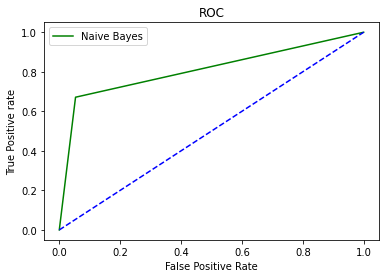

In [43]:
clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0,
                        n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

clf.fit(cont_train_vec, dep_train)
preds = clf.predict(cont_test_vec)

confusionMatrix = confusion_matrix(dep_test, preds)
print(confusionMatrix)

print('Recall   :', metrics.recall_score(dep_test, preds))
print('Accuracy :', metrics.accuracy_score(dep_test, preds))
plot_auc(dep_test, preds)

In [44]:
RFCLF2 = clf

## Symptom 3

In [45]:
# Set indicator for symptoms except 3 to 0
df_symp_one_Y = df[df['symp_one']==1][['ID','Content','symp_one']]
df_symp_one_Y=df_symp_one_Y.rename(columns={'symp_one':'symp'})
df_symp_one_Y["symp"].replace({1: 0}, inplace=True)

df_symp_two_Y = df[df['symp_two']== 1][['ID','Content','symp_two']]
df_symp_two_Y=df_symp_two_Y.rename(columns={'symp_two':'symp'})
df_symp_two_Y["symp"].replace({1: 0}, inplace=True)

df_symp_three_Y = df[df['symp_three']==1][['ID','Content','symp_three']]
df_symp_three_Y=df_symp_three_Y.rename(columns={'symp_three':'symp'})

df_symp_four_Y = df[df['symp_four']==1][['ID','Content','symp_four']]
df_symp_four_Y=df_symp_four_Y.rename(columns={'symp_four':'symp'})
df_symp_four_Y["symp"].replace({1: 0}, inplace=True)

df_symp_five_Y = df[df['symp_five']==1][['ID','Content','symp_five']]
df_symp_five_Y=df_symp_five_Y.rename(columns={'symp_five':'symp'})
df_symp_five_Y["symp"].replace({1: 0}, inplace=True)

df_symp_six_Y = df[df['symp_six']==1][['ID','Content','symp_six']]
df_symp_six_Y=df_symp_six_Y.rename(columns={'symp_six':'symp'})
df_symp_six_Y["symp"].replace({1: 0}, inplace=True)

df_symp_seven_Y = df[df['symp_seven']==1][['ID','Content','symp_seven']]
df_symp_seven_Y=df_symp_seven_Y.rename(columns={'symp_seven':'symp'})
df_symp_seven_Y["symp"].replace({1: 0}, inplace=True)

df_symp_None_Y = df[df['None']==1][['ID','Content','None']]
df_symp_None_Y=df_symp_None_Y.rename(columns={'None':'symp'})
df_symp_None_Y["symp"].replace({1: 0}, inplace=True)

In [46]:
df_trans=pd.concat([df_symp_one_Y,df_symp_two_Y,df_symp_three_Y, df_symp_four_Y, df_symp_five_Y,df_symp_six_Y ,
                   df_symp_seven_Y, df_symp_None_Y], ignore_index=True)

# add a new column, the length of the content 
df_trans['length']=df_trans['Content'].apply(len)


In [47]:
# Vectorize text 
cont_train, cont_test,dep_train,dep_test = get_samples(df_trans)
vectorizer_sym3 = TfidfVectorizer(analyzer='word',stop_words= 'english')
vectorizer_sym3.fit_transform(cont_train["Content"])
cont_train_vec=vectorizer_sym3.transform(cont_train["Content"]).toarray()
cont_test_vec=vectorizer_sym3.transform(cont_test['Content']).toarray()

Before oversampling:  Counter({0: 17825, 1: 725})
After oversampling:  Counter({0: 1812, 1: 1812})


[[6477 1180]
 [ 185  109]]
Recall   : 0.3707482993197279
Accuracy : 0.828323481323104
AUC: 0.6083204732853047


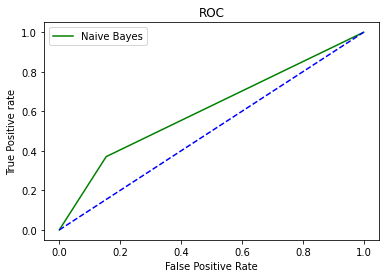

In [48]:
clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0,
                        n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

clf.fit(cont_train_vec, dep_train)
preds = clf.predict(cont_test_vec)

confusionMatrix = confusion_matrix(dep_test, preds)
print(confusionMatrix)

print('Recall   :', metrics.recall_score(dep_test, preds))
print('Accuracy :', metrics.accuracy_score(dep_test, preds))
plot_auc(dep_test, preds)

In [49]:
RFCLF3 = clf

## Symptom 4

In [50]:
# Set indicator for symptoms except 4 to 0
df_symp_one_Y = df[df['symp_one']==1][['ID','Content','symp_one']]
df_symp_one_Y=df_symp_one_Y.rename(columns={'symp_one':'symp'})
df_symp_one_Y["symp"].replace({1: 0}, inplace=True)

df_symp_two_Y = df[df['symp_two']== 1][['ID','Content','symp_two']]
df_symp_two_Y=df_symp_two_Y.rename(columns={'symp_two':'symp'})
df_symp_two_Y["symp"].replace({1: 0}, inplace=True)

df_symp_three_Y = df[df['symp_three']==1][['ID','Content','symp_three']]
df_symp_three_Y=df_symp_three_Y.rename(columns={'symp_three':'symp'})
df_symp_three_Y["symp"].replace({1: 0}, inplace=True)

df_symp_four_Y = df[df['symp_four']==1][['ID','Content','symp_four']]
df_symp_four_Y=df_symp_four_Y.rename(columns={'symp_four':'symp'})


df_symp_five_Y = df[df['symp_five']==1][['ID','Content','symp_five']]
df_symp_five_Y=df_symp_five_Y.rename(columns={'symp_five':'symp'})
df_symp_five_Y["symp"].replace({1: 0}, inplace=True)

df_symp_six_Y = df[df['symp_six']==1][['ID','Content','symp_six']]
df_symp_six_Y=df_symp_six_Y.rename(columns={'symp_six':'symp'})
df_symp_six_Y["symp"].replace({1: 0}, inplace=True)

df_symp_seven_Y = df[df['symp_seven']==1][['ID','Content','symp_seven']]
df_symp_seven_Y=df_symp_seven_Y.rename(columns={'symp_seven':'symp'})
df_symp_seven_Y["symp"].replace({1: 0}, inplace=True)

df_symp_None_Y = df[df['None']==1][['ID','Content','None']]
df_symp_None_Y=df_symp_None_Y.rename(columns={'None':'symp'})
df_symp_None_Y["symp"].replace({1: 0}, inplace=True)

In [51]:
df_trans=pd.concat([df_symp_one_Y,df_symp_two_Y,df_symp_three_Y, df_symp_four_Y, df_symp_five_Y,df_symp_six_Y ,
                   df_symp_seven_Y, df_symp_None_Y], ignore_index=True)

# add a new column, the length of the content 
df_trans['length']=df_trans['Content'].apply(len)


In [52]:
# Vectorize text 
cont_train, cont_test,dep_train,dep_test = get_samples(df_trans)
vectorizer_sym4 = TfidfVectorizer(analyzer='word',stop_words= 'english')
vectorizer_sym4.fit_transform(cont_train["Content"])
cont_train_vec=vectorizer_sym4.transform(cont_train["Content"]).toarray()
cont_test_vec=vectorizer_sym4.transform(cont_test['Content']).toarray()

Before oversampling:  Counter({0: 15689, 1: 2861})
After oversampling:  Counter({0: 7152, 1: 7152})


[[5364 1388]
 [ 712  487]]
Recall   : 0.4061718098415346
Accuracy : 0.7358822789586216
AUC: 0.6003015447311938


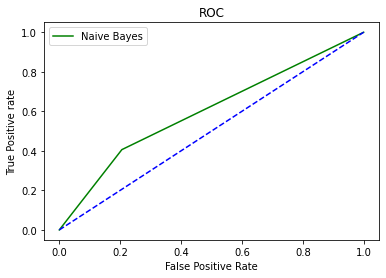

In [53]:
clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0,
                        n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

clf.fit(cont_train_vec, dep_train)
preds = clf.predict(cont_test_vec)

confusionMatrix = confusion_matrix(dep_test, preds)
print(confusionMatrix)

print('Recall   :', metrics.recall_score(dep_test, preds))
print('Accuracy :', metrics.accuracy_score(dep_test, preds))
plot_auc(dep_test, preds)

In [54]:
RFCLF4 = clf

## Symptom 5

In [55]:
# Set indicator for symptoms except 5 to 0
df_symp_one_Y = df[df['symp_one']==1][['ID','Content','symp_one']]
df_symp_one_Y=df_symp_one_Y.rename(columns={'symp_one':'symp'})
df_symp_one_Y["symp"].replace({1: 0}, inplace=True)

df_symp_two_Y = df[df['symp_two']== 1][['ID','Content','symp_two']]
df_symp_two_Y=df_symp_two_Y.rename(columns={'symp_two':'symp'})
df_symp_two_Y["symp"].replace({1: 0}, inplace=True)

df_symp_three_Y = df[df['symp_three']==1][['ID','Content','symp_three']]
df_symp_three_Y=df_symp_three_Y.rename(columns={'symp_three':'symp'})
df_symp_three_Y["symp"].replace({1: 0}, inplace=True)

df_symp_four_Y = df[df['symp_four']==1][['ID','Content','symp_four']]
df_symp_four_Y=df_symp_four_Y.rename(columns={'symp_four':'symp'})
df_symp_four_Y["symp"].replace({1: 0}, inplace=True)

df_symp_five_Y = df[df['symp_five']==1][['ID','Content','symp_five']]
df_symp_five_Y=df_symp_five_Y.rename(columns={'symp_five':'symp'})

df_symp_six_Y = df[df['symp_six']==1][['ID','Content','symp_six']]
df_symp_six_Y=df_symp_six_Y.rename(columns={'symp_six':'symp'})
df_symp_six_Y["symp"].replace({1: 0}, inplace=True)

df_symp_seven_Y = df[df['symp_seven']==1][['ID','Content','symp_seven']]
df_symp_seven_Y=df_symp_seven_Y.rename(columns={'symp_seven':'symp'})
df_symp_seven_Y["symp"].replace({1: 0}, inplace=True)

df_symp_None_Y = df[df['None']==1][['ID','Content','None']]
df_symp_None_Y=df_symp_None_Y.rename(columns={'None':'symp'})
df_symp_None_Y["symp"].replace({1: 0}, inplace=True)

In [56]:
df_trans=pd.concat([df_symp_one_Y,df_symp_two_Y,df_symp_three_Y, df_symp_four_Y, df_symp_five_Y,df_symp_six_Y ,
                   df_symp_seven_Y, df_symp_None_Y], ignore_index=True)

# add a new column, the length of the content 
df_trans['length']=df_trans['Content'].apply(len)


In [57]:
# Vectorize text 
cont_train, cont_test,dep_train,dep_test = get_samples(df_trans)
vectorizer_sym5 = TfidfVectorizer(analyzer='word',stop_words= 'english')
vectorizer_sym5.fit_transform(cont_train["Content"])
cont_train_vec=vectorizer_sym5.transform(cont_train["Content"]).toarray()
cont_test_vec=vectorizer_sym5.transform(cont_test['Content']).toarray()

Before oversampling:  Counter({0: 17127, 1: 1423})
After oversampling:  Counter({0: 3557, 1: 3557})


[[5997 1348]
 [ 397  209]]
Recall   : 0.3448844884488449
Accuracy : 0.7805307508489499
AUC: 0.5806791400719378


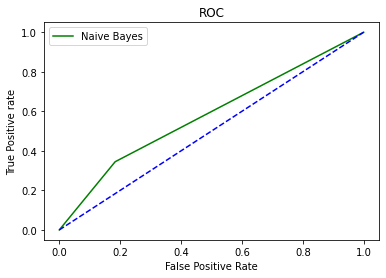

In [58]:
clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0,
                        n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

clf.fit(cont_train_vec, dep_train)
preds = clf.predict(cont_test_vec)

confusionMatrix = confusion_matrix(dep_test, preds)
print(confusionMatrix)

print('Recall   :', metrics.recall_score(dep_test, preds))
print('Accuracy :', metrics.accuracy_score(dep_test, preds))
plot_auc(dep_test, preds)


In [59]:
RFCLF5 = clf

## Symptom 6

In [60]:
# Set indicator for symptoms except 6 to 0
df_symp_one_Y = df[df['symp_one']==1][['ID','Content','symp_one']]
df_symp_one_Y=df_symp_one_Y.rename(columns={'symp_one':'symp'})
df_symp_one_Y["symp"].replace({1: 0}, inplace=True)

df_symp_two_Y = df[df['symp_two']== 1][['ID','Content','symp_two']]
df_symp_two_Y=df_symp_two_Y.rename(columns={'symp_two':'symp'})
df_symp_two_Y["symp"].replace({1: 0}, inplace=True)

df_symp_three_Y = df[df['symp_three']==1][['ID','Content','symp_three']]
df_symp_three_Y=df_symp_three_Y.rename(columns={'symp_three':'symp'})
df_symp_three_Y["symp"].replace({1: 0}, inplace=True)

df_symp_four_Y = df[df['symp_four']==1][['ID','Content','symp_four']]
df_symp_four_Y=df_symp_four_Y.rename(columns={'symp_four':'symp'})
df_symp_four_Y["symp"].replace({1: 0}, inplace=True)

df_symp_five_Y = df[df['symp_five']==1][['ID','Content','symp_five']]
df_symp_five_Y=df_symp_five_Y.rename(columns={'symp_five':'symp'})
df_symp_five_Y["symp"].replace({1: 0}, inplace=True)

df_symp_six_Y = df[df['symp_six']==1][['ID','Content','symp_six']]
df_symp_six_Y=df_symp_six_Y.rename(columns={'symp_six':'symp'})

df_symp_seven_Y = df[df['symp_seven']==1][['ID','Content','symp_seven']]
df_symp_seven_Y=df_symp_seven_Y.rename(columns={'symp_seven':'symp'})
df_symp_seven_Y["symp"].replace({1: 0}, inplace=True)

df_symp_None_Y = df[df['None']==1][['ID','Content','None']]
df_symp_None_Y=df_symp_None_Y.rename(columns={'None':'symp'})
df_symp_None_Y["symp"].replace({1: 0}, inplace=True)

In [61]:
df_trans=pd.concat([df_symp_one_Y,df_symp_two_Y,df_symp_three_Y, df_symp_four_Y, df_symp_five_Y,df_symp_six_Y ,
                   df_symp_seven_Y, df_symp_None_Y], ignore_index=True)

# add a new column, the length of the content 
df_trans['length']=df_trans['Content'].apply(len)


In [62]:
# Vectorize text 
cont_train, cont_test,dep_train,dep_test = get_samples(df_trans)
vectorizer_sym6 = TfidfVectorizer(analyzer='word',stop_words= 'english')
vectorizer_sym6.fit_transform(cont_train["Content"])
cont_train_vec=vectorizer_sym6.transform(cont_train["Content"]).toarray()
cont_test_vec=vectorizer_sym6.transform(cont_test['Content']).toarray()

Before oversampling:  Counter({0: 18132, 1: 418})
After oversampling:  Counter({0: 1045, 1: 1045})


[[6955  824]
 [ 113   59]]
Recall   : 0.3430232558139535
Accuracy : 0.882153188278204
AUC: 0.6185485221093162


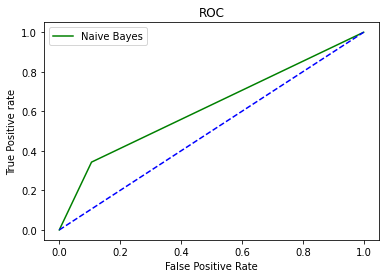

In [63]:
clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0,
                        n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

clf.fit(cont_train_vec, dep_train)
preds = clf.predict(cont_test_vec)

confusionMatrix = confusion_matrix(dep_test, preds)
print(confusionMatrix)

print('Recall   :', metrics.recall_score(dep_test, preds))
print('Accuracy :', metrics.accuracy_score(dep_test, preds))
plot_auc(dep_test, preds)


In [64]:
RFCLF6 = clf

## Symptom 7

In [65]:
# Set indicator for symptoms except 7 to 0
df_symp_one_Y = df[df['symp_one']==1][['ID','Content','symp_one']]
df_symp_one_Y=df_symp_one_Y.rename(columns={'symp_one':'symp'})
df_symp_one_Y["symp"].replace({1: 0}, inplace=True)

df_symp_two_Y = df[df['symp_two']== 1][['ID','Content','symp_two']]
df_symp_two_Y=df_symp_two_Y.rename(columns={'symp_two':'symp'})
df_symp_two_Y["symp"].replace({1: 0}, inplace=True)

df_symp_three_Y = df[df['symp_three']==1][['ID','Content','symp_three']]
df_symp_three_Y=df_symp_three_Y.rename(columns={'symp_three':'symp'})
df_symp_three_Y["symp"].replace({1: 0}, inplace=True)

df_symp_four_Y = df[df['symp_four']==1][['ID','Content','symp_four']]
df_symp_four_Y=df_symp_four_Y.rename(columns={'symp_four':'symp'})
df_symp_four_Y["symp"].replace({1: 0}, inplace=True)

df_symp_five_Y = df[df['symp_five']==1][['ID','Content','symp_five']]
df_symp_five_Y=df_symp_five_Y.rename(columns={'symp_five':'symp'})
df_symp_five_Y["symp"].replace({1: 0}, inplace=True)

df_symp_six_Y = df[df['symp_six']==1][['ID','Content','symp_six']]
df_symp_six_Y=df_symp_six_Y.rename(columns={'symp_six':'symp'})
df_symp_six_Y["symp"].replace({1: 0}, inplace=True)

df_symp_seven_Y = df[df['symp_seven']==1][['ID','Content','symp_seven']]
df_symp_seven_Y=df_symp_seven_Y.rename(columns={'symp_seven':'symp'})

df_symp_None_Y = df[df['None']==1][['ID','Content','None']]
df_symp_None_Y=df_symp_None_Y.rename(columns={'None':'symp'})
df_symp_None_Y["symp"].replace({1: 0}, inplace=True)

In [66]:
df_trans=pd.concat([df_symp_one_Y,df_symp_two_Y,df_symp_three_Y, df_symp_four_Y, df_symp_five_Y,df_symp_six_Y ,
                   df_symp_seven_Y, df_symp_None_Y], ignore_index=True)

# add a new column, the length of the content 
df_trans['length']=df_trans['Content'].apply(len)


In [67]:
# Vectorize text 
cont_train, cont_test,dep_train,dep_test = get_samples(df_trans)
vectorizer_sym7 = TfidfVectorizer(analyzer='word',stop_words= 'english')
vectorizer_sym7.fit_transform(cont_train["Content"])
cont_train_vec=vectorizer_sym7.transform(cont_train["Content"]).toarray()
cont_test_vec=vectorizer_sym7.transform(cont_test['Content']).toarray()

Before oversampling:  Counter({0: 17860, 1: 690})
After oversampling:  Counter({0: 1725, 1: 1725})


[[6901  733]
 [ 138  179]]
Recall   : 0.5646687697160884
Accuracy : 0.8904540309395045
AUC: 0.7343254773390502


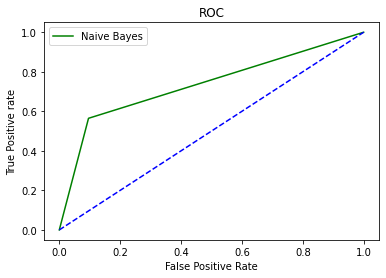

In [68]:
clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0,
                        n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

clf.fit(cont_train_vec, dep_train)
preds = clf.predict(cont_test_vec)

confusionMatrix = confusion_matrix(dep_test, preds)
print(confusionMatrix)

print('Recall   :', metrics.recall_score(dep_test, preds))
print('Accuracy :', metrics.accuracy_score(dep_test, preds))
plot_auc(dep_test, preds)


In [69]:
RFCLF7 = clf

#Assemble the 7 models as the final predictor for depression

In [70]:
df_test

,ID,AuthorID,Author,Date,Content,Words,symp_one,symp_two,symp_three,symp_four,symp_five,symp_six,symp_seven,None
12,13,3.030000e+17,Emma/Blue#2035,43630.88194,it‚äôs like take knife try stab cut nerve arm,17,0,0,0,0.0,0,0,0.0,1.0
15,16,4.840000e+17,Lucid_Thoughts#2342,43631.01458,minute ago thing feel like sharp pain,17,0,0,0,0.0,0,0,1.0,0.0
22,23,4.120000e+17,~‚òÖ~#0666,43631.43889,abusive family difficult violent help tell help,32,0,0,0,1.0,1,0,0.0,0.0
27,28,3.660000e+17,BasicCouple#7323,43631.45903,severely injure break bone burn stab wound lif...,63,0,0,0,1.0,0,1,1.0,0.0
32,33,3.030000e+17,Emma/Blue#2035,43631.625,don‚äôt reason say i‚äôm burden way help,28,0,0,1,1.0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23959,23965,3.460000e+17,gogy~#2680,44070.52986,wanna kill literally push limit man not shit a...,15,0,0,0,0.0,0,0,1.0,0.0
23961,23967,2.290000e+17,alex.#5092,44070.75764,need bit help decision choice simple m give re...,27,0,0,0,0.0,0,0,0.0,1.0
23962,23968,5.320000e+17,BrielleBunnyüíç#8328,44070.90139,bad day try hard happy,16,0,0,0,0.0,0,0,0.0,1.0
23974,23980,3.210000e+17,cocosiz#2140,44071.11667,usually smoke weed amplify feel make anxious,19,0,0,0,1.0,0,0,0.0,0.0


In [71]:
# add column to identify number of symptoms
df_test['num_symptoms'] = [0]*len(df_test)

for i in range(0,len(df_test)):
  df_test['num_symptoms'].iloc[i] = df_test['symp_one'].iloc[i] + df_test['symp_two'].iloc[i] + df_test['symp_three'].iloc[i] + df_test['symp_four'].iloc[i] + df_test['symp_five'].iloc[i] + df_test['symp_six'].iloc[i] + df_test['symp_seven'].iloc[i]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [72]:
# add target column
y_valid1 = [1 if x >= 1 else 0 for x in df_test['num_symptoms']]
y_valid2 = [1 if x >= 2 else 0 for x in df_test['num_symptoms']]
y_valid3 = [1 if x >= 3 else 0 for x in df_test['num_symptoms']]
y_valid4 = [1 if x >= 4 else 0 for x in df_test['num_symptoms']]
y_valid5 = [1 if x >= 5 else 0 for x in df_test['num_symptoms']]

In [73]:
X_valid = df_test['Content']

In [74]:
def final_predictor1(X_valid):
  test_vec1=vectorizer_sym1.transform(X_valid.values).toarray()
  pred1 = RFCLF1.predict(test_vec1)
  test_vec2=vectorizer_sym2.transform(X_valid.values).toarray()
  pred2 = RFCLF2.predict(test_vec2)
  test_vec3=vectorizer_sym3.transform(X_valid.values).toarray()
  pred3 = RFCLF3.predict(test_vec3)
  test_vec4=vectorizer_sym4.transform(X_valid.values).toarray()
  pred4 = RFCLF4.predict(test_vec4)
  test_vec5=vectorizer_sym5.transform(X_valid.values).toarray()
  pred5 = RFCLF5.predict(test_vec5)
  test_vec6=vectorizer_sym6.transform(X_valid.values).toarray()
  pred6 = RFCLF6.predict(test_vec6)
  test_vec7=vectorizer_sym7.transform(X_valid.values).toarray()
  pred7 = RFCLF7.predict(test_vec7)
  
  arr = np.array([pred1, pred2, pred3, pred4, pred5, pred6, pred7])
  temp_preds = arr.sum(axis=0)
  preds = [1 if x >= 1 else 0 for x in temp_preds]
  return preds

In [75]:
def final_predictor2(X_valid):
  test_vec1=vectorizer_sym1.transform(X_valid.values).toarray()
  pred1 = RFCLF1.predict(test_vec1)
  test_vec2=vectorizer_sym2.transform(X_valid.values).toarray()
  pred2 = RFCLF2.predict(test_vec2)
  test_vec3=vectorizer_sym3.transform(X_valid.values).toarray()
  pred3 = RFCLF3.predict(test_vec3)
  test_vec4=vectorizer_sym4.transform(X_valid.values).toarray()
  pred4 = RFCLF4.predict(test_vec4)
  test_vec5=vectorizer_sym5.transform(X_valid.values).toarray()
  pred5 = RFCLF5.predict(test_vec5)
  test_vec6=vectorizer_sym6.transform(X_valid.values).toarray()
  pred6 = RFCLF6.predict(test_vec6)
  test_vec7=vectorizer_sym7.transform(X_valid.values).toarray()
  pred7 = RFCLF7.predict(test_vec7)
  
  arr = np.array([pred1, pred2, pred3, pred4, pred5, pred6, pred7])
  temp_preds = arr.sum(axis=0)
  preds = [1 if x >= 2 else 0 for x in temp_preds]
  return preds

In [76]:
def final_predictor3(X_valid):
  test_vec1=vectorizer_sym1.transform(X_valid.values).toarray()
  pred1 = RFCLF1.predict(test_vec1)
  test_vec2=vectorizer_sym2.transform(X_valid.values).toarray()
  pred2 = RFCLF2.predict(test_vec2)
  test_vec3=vectorizer_sym3.transform(X_valid.values).toarray()
  pred3 = RFCLF3.predict(test_vec3)
  test_vec4=vectorizer_sym4.transform(X_valid.values).toarray()
  pred4 = RFCLF4.predict(test_vec4)
  test_vec5=vectorizer_sym5.transform(X_valid.values).toarray()
  pred5 = RFCLF5.predict(test_vec5)
  test_vec6=vectorizer_sym6.transform(X_valid.values).toarray()
  pred6 = RFCLF6.predict(test_vec6)
  test_vec7=vectorizer_sym7.transform(X_valid.values).toarray()
  pred7 = RFCLF7.predict(test_vec7)
  
  arr = np.array([pred1, pred2, pred3, pred4, pred5, pred6, pred7])
  temp_preds = arr.sum(axis=0)
  preds = [1 if x >= 3 else 0 for x in temp_preds]
  return preds

In [77]:
def final_predictor4(X_valid):
  test_vec1=vectorizer_sym1.transform(X_valid.values).toarray()
  pred1 = RFCLF1.predict(test_vec1)
  test_vec2=vectorizer_sym2.transform(X_valid.values).toarray()
  pred2 = RFCLF2.predict(test_vec2)
  test_vec3=vectorizer_sym3.transform(X_valid.values).toarray()
  pred3 = RFCLF3.predict(test_vec3)
  test_vec4=vectorizer_sym4.transform(X_valid.values).toarray()
  pred4 = RFCLF4.predict(test_vec4)
  test_vec5=vectorizer_sym5.transform(X_valid.values).toarray()
  pred5 = RFCLF5.predict(test_vec5)
  test_vec6=vectorizer_sym6.transform(X_valid.values).toarray()
  pred6 = RFCLF6.predict(test_vec6)
  test_vec7=vectorizer_sym7.transform(X_valid.values).toarray()
  pred7 = RFCLF7.predict(test_vec7)
  
  arr = np.array([pred1, pred2, pred3, pred4, pred5, pred6, pred7])
  temp_preds = arr.sum(axis=0)
  preds = [1 if x >= 4 else 0 for x in temp_preds]
  return preds

In [78]:
def final_predictor5(X_valid):
  test_vec1=vectorizer_sym1.transform(X_valid.values).toarray()
  pred1 = RFCLF1.predict(test_vec1)
  test_vec2=vectorizer_sym2.transform(X_valid.values).toarray()
  pred2 = RFCLF2.predict(test_vec2)
  test_vec3=vectorizer_sym3.transform(X_valid.values).toarray()
  pred3 = RFCLF3.predict(test_vec3)
  test_vec4=vectorizer_sym4.transform(X_valid.values).toarray()
  pred4 = RFCLF4.predict(test_vec4)
  test_vec5=vectorizer_sym5.transform(X_valid.values).toarray()
  pred5 = RFCLF5.predict(test_vec5)
  test_vec6=vectorizer_sym6.transform(X_valid.values).toarray()
  pred6 = RFCLF6.predict(test_vec6)
  test_vec7=vectorizer_sym7.transform(X_valid.values).toarray()
  pred7 = RFCLF7.predict(test_vec7)
  
  arr = np.array([pred1, pred2, pred3, pred4, pred5, pred6, pred7])
  temp_preds = arr.sum(axis=0)
  preds = [1 if x >= 5 else 0 for x in temp_preds]
  return preds

In [79]:
def final_predictor6(X_valid):
  test_vec1=vectorizer_sym1.transform(X_valid.values).toarray()
  pred1 = RFCLF1.predict(test_vec1)
  test_vec2=vectorizer_sym2.transform(X_valid.values).toarray()
  pred2 = RFCLF2.predict(test_vec2)
  test_vec3=vectorizer_sym3.transform(X_valid.values).toarray()
  pred3 = RFCLF3.predict(test_vec3)
  test_vec4=vectorizer_sym4.transform(X_valid.values).toarray()
  pred4 = RFCLF4.predict(test_vec4)
  test_vec5=vectorizer_sym5.transform(X_valid.values).toarray()
  pred5 = RFCLF5.predict(test_vec5)
  test_vec6=vectorizer_sym6.transform(X_valid.values).toarray()
  pred6 = RFCLF6.predict(test_vec6)
  test_vec7=vectorizer_sym7.transform(X_valid.values).toarray()
  pred7 = RFCLF7.predict(test_vec7)
  
  arr = np.array([pred1, pred2, pred3, pred4, pred5, pred6, pred7])
  temp_preds = arr.sum(axis=0)
  preds = [1 if x >= 6 else 0 for x in temp_preds]
  return preds

In [80]:
def eval(y_valid, y_preds):
  confusionMatrix = confusion_matrix(y_valid, y_preds)
  print(confusionMatrix)
  print('Precision:', metrics.precision_score(y_valid, y_preds, pos_label=1))
  print('Recall   :', metrics.recall_score(y_valid, y_preds, pos_label=1))
  print('Accuracy :', metrics.accuracy_score(y_valid, y_preds))
  print('F1 score :', metrics.f1_score(y_valid, y_preds, pos_label=1))
  plot_auc(y_valid, y_preds)

In [81]:
y_preds1 = final_predictor1(X_valid)
y_preds2 = final_predictor2(X_valid)
y_preds3 = final_predictor3(X_valid)
y_preds4 = final_predictor4(X_valid)
y_preds5 = final_predictor5(X_valid)

[[2097 1307]
 [ 250 1142]]
Precision: 0.4663127807268273
Recall   : 0.8204022988505747
Accuracy : 0.6753544620517098
F1 score : 0.594636813329862
AUC: 0.7182211259235247


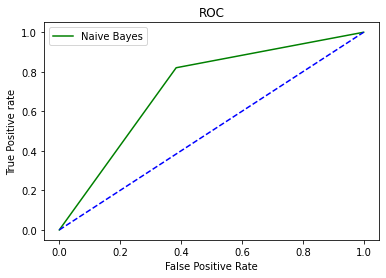

In [82]:
eval(y_valid1, y_preds1)

[[3583  833]
 [ 143  237]]
Precision: 0.22149532710280373
Recall   : 0.6236842105263158
Accuracy : 0.7964970809007507
F1 score : 0.32689655172413795
AUC: 0.7175259820747522


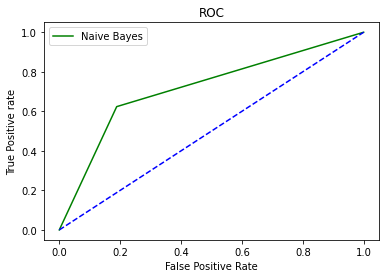

In [83]:
eval(y_valid2, y_preds2)

[[4381  321]
 [  46   48]]
Precision: 0.13008130081300814
Recall   : 0.5106382978723404
Accuracy : 0.9234778982485404
F1 score : 0.20734341252699784
AUC: 0.7211847380471867


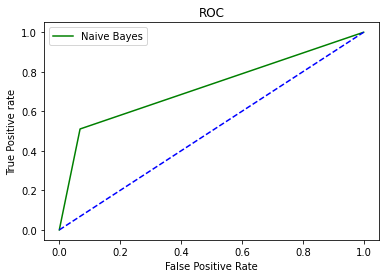

In [84]:
eval(y_valid3, y_preds3)

[[4664  106]
 [  13   13]]
Precision: 0.1092436974789916
Recall   : 0.5
Accuracy : 0.9751876563803169
F1 score : 0.1793103448275862
AUC: 0.7388888888888888


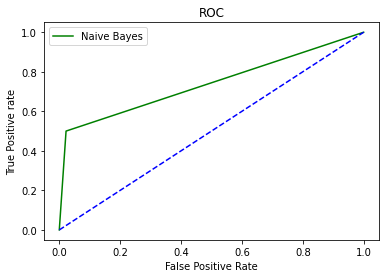

In [85]:
eval(y_valid4, y_preds4)

[[4757   35]
 [   0    4]]
Precision: 0.10256410256410256
Recall   : 1.0
Accuracy : 0.9927022518765638
F1 score : 0.18604651162790695
AUC: 0.9963480801335559


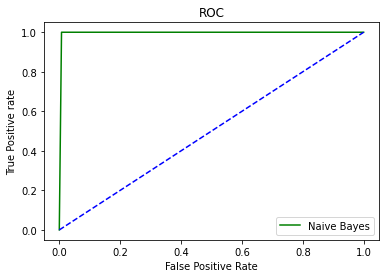

In [86]:
eval(y_valid5, y_preds5)